In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [149]:
data = pd.read_csv('bank-additional.csv', sep = ';')

In [93]:
# basic information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [99]:
X = data.drop('y', axis=1) #Splitting data into X and y features by assuming y is the target.
y = data['y']

In [101]:
type(data)

pandas.core.frame.DataFrame

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting data: training 80%, testing 20%

In [107]:
#initializing imputer for numerical and categorical data
num_imputer = SimpleImputer(strategy = 'mean')
cat_imputer = SimpleImputer(strategy = 'most_frequent')

In [109]:
#Seperating numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [111]:
#Now applying the imputers
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

X_test[num_cols] = num_imputer.fit_transform(X_test[num_cols])
X_test[cat_cols] = cat_imputer.fit_transform(X_test[cat_cols])

In [113]:
# Ensure X_train and X_test are DataFrames with correct columns
X_train = pd.DataFrame(X_train, columns=num_cols.tolist() + cat_cols.tolist())
X_test = pd.DataFrame(X_test, columns=num_cols.tolist() + cat_cols.tolist())

In [117]:
#Encoding categorical features and scaling numerical features
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [145]:
#Initializing OneHotEncoder 
encoder = OneHotEncoder(handle_unknown='ignore')

#To fit and transform the data;
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.fit_transform(X_test)

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Define numerical and categorical transformers
num_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy ='mean')),
     ('scaler', StandardScaler())
])

cat_encoder = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy ='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [77]:
#Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_scaler, num_cols),
        ('cat', cat_encoder, cat_cols)
    ])

In [123]:
# Applying the transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

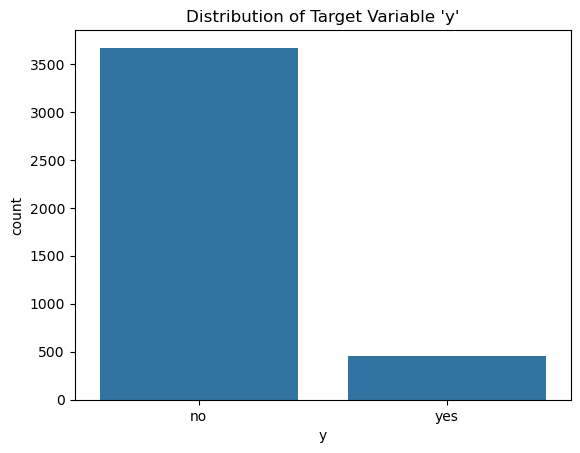

In [125]:
# Exploratory Data Analysis (EDA)
# Example: Distribution of target variable

sns.countplot(x=y)
plt.title("Distribution of Target Variable 'y'")
plt.show()

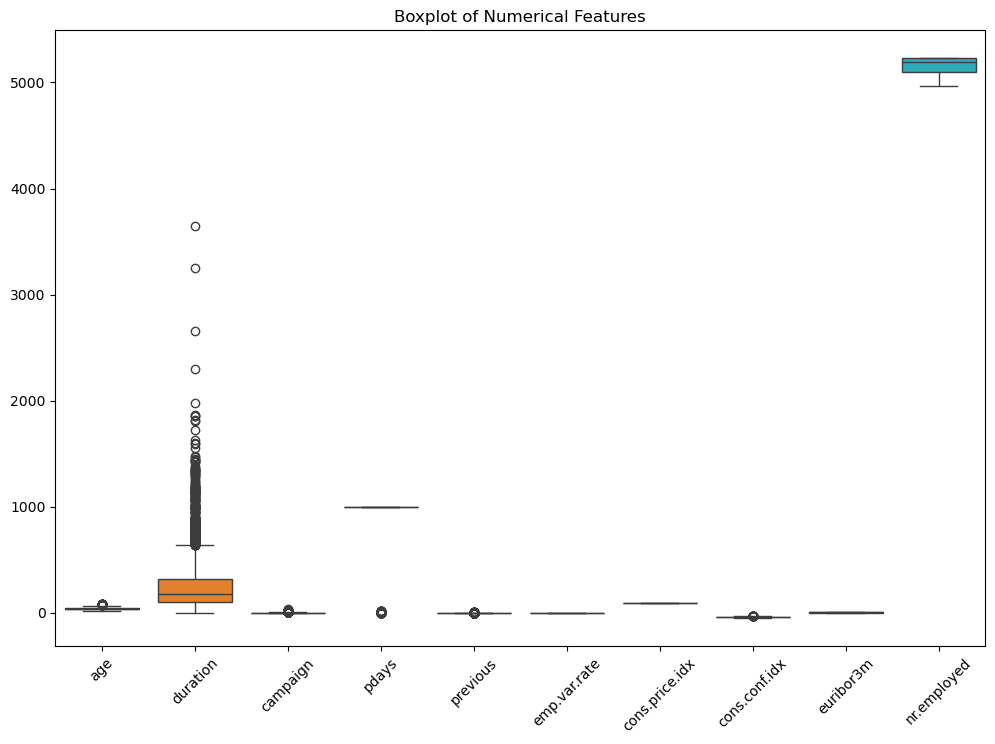

In [127]:
#Example: Boxplot of numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

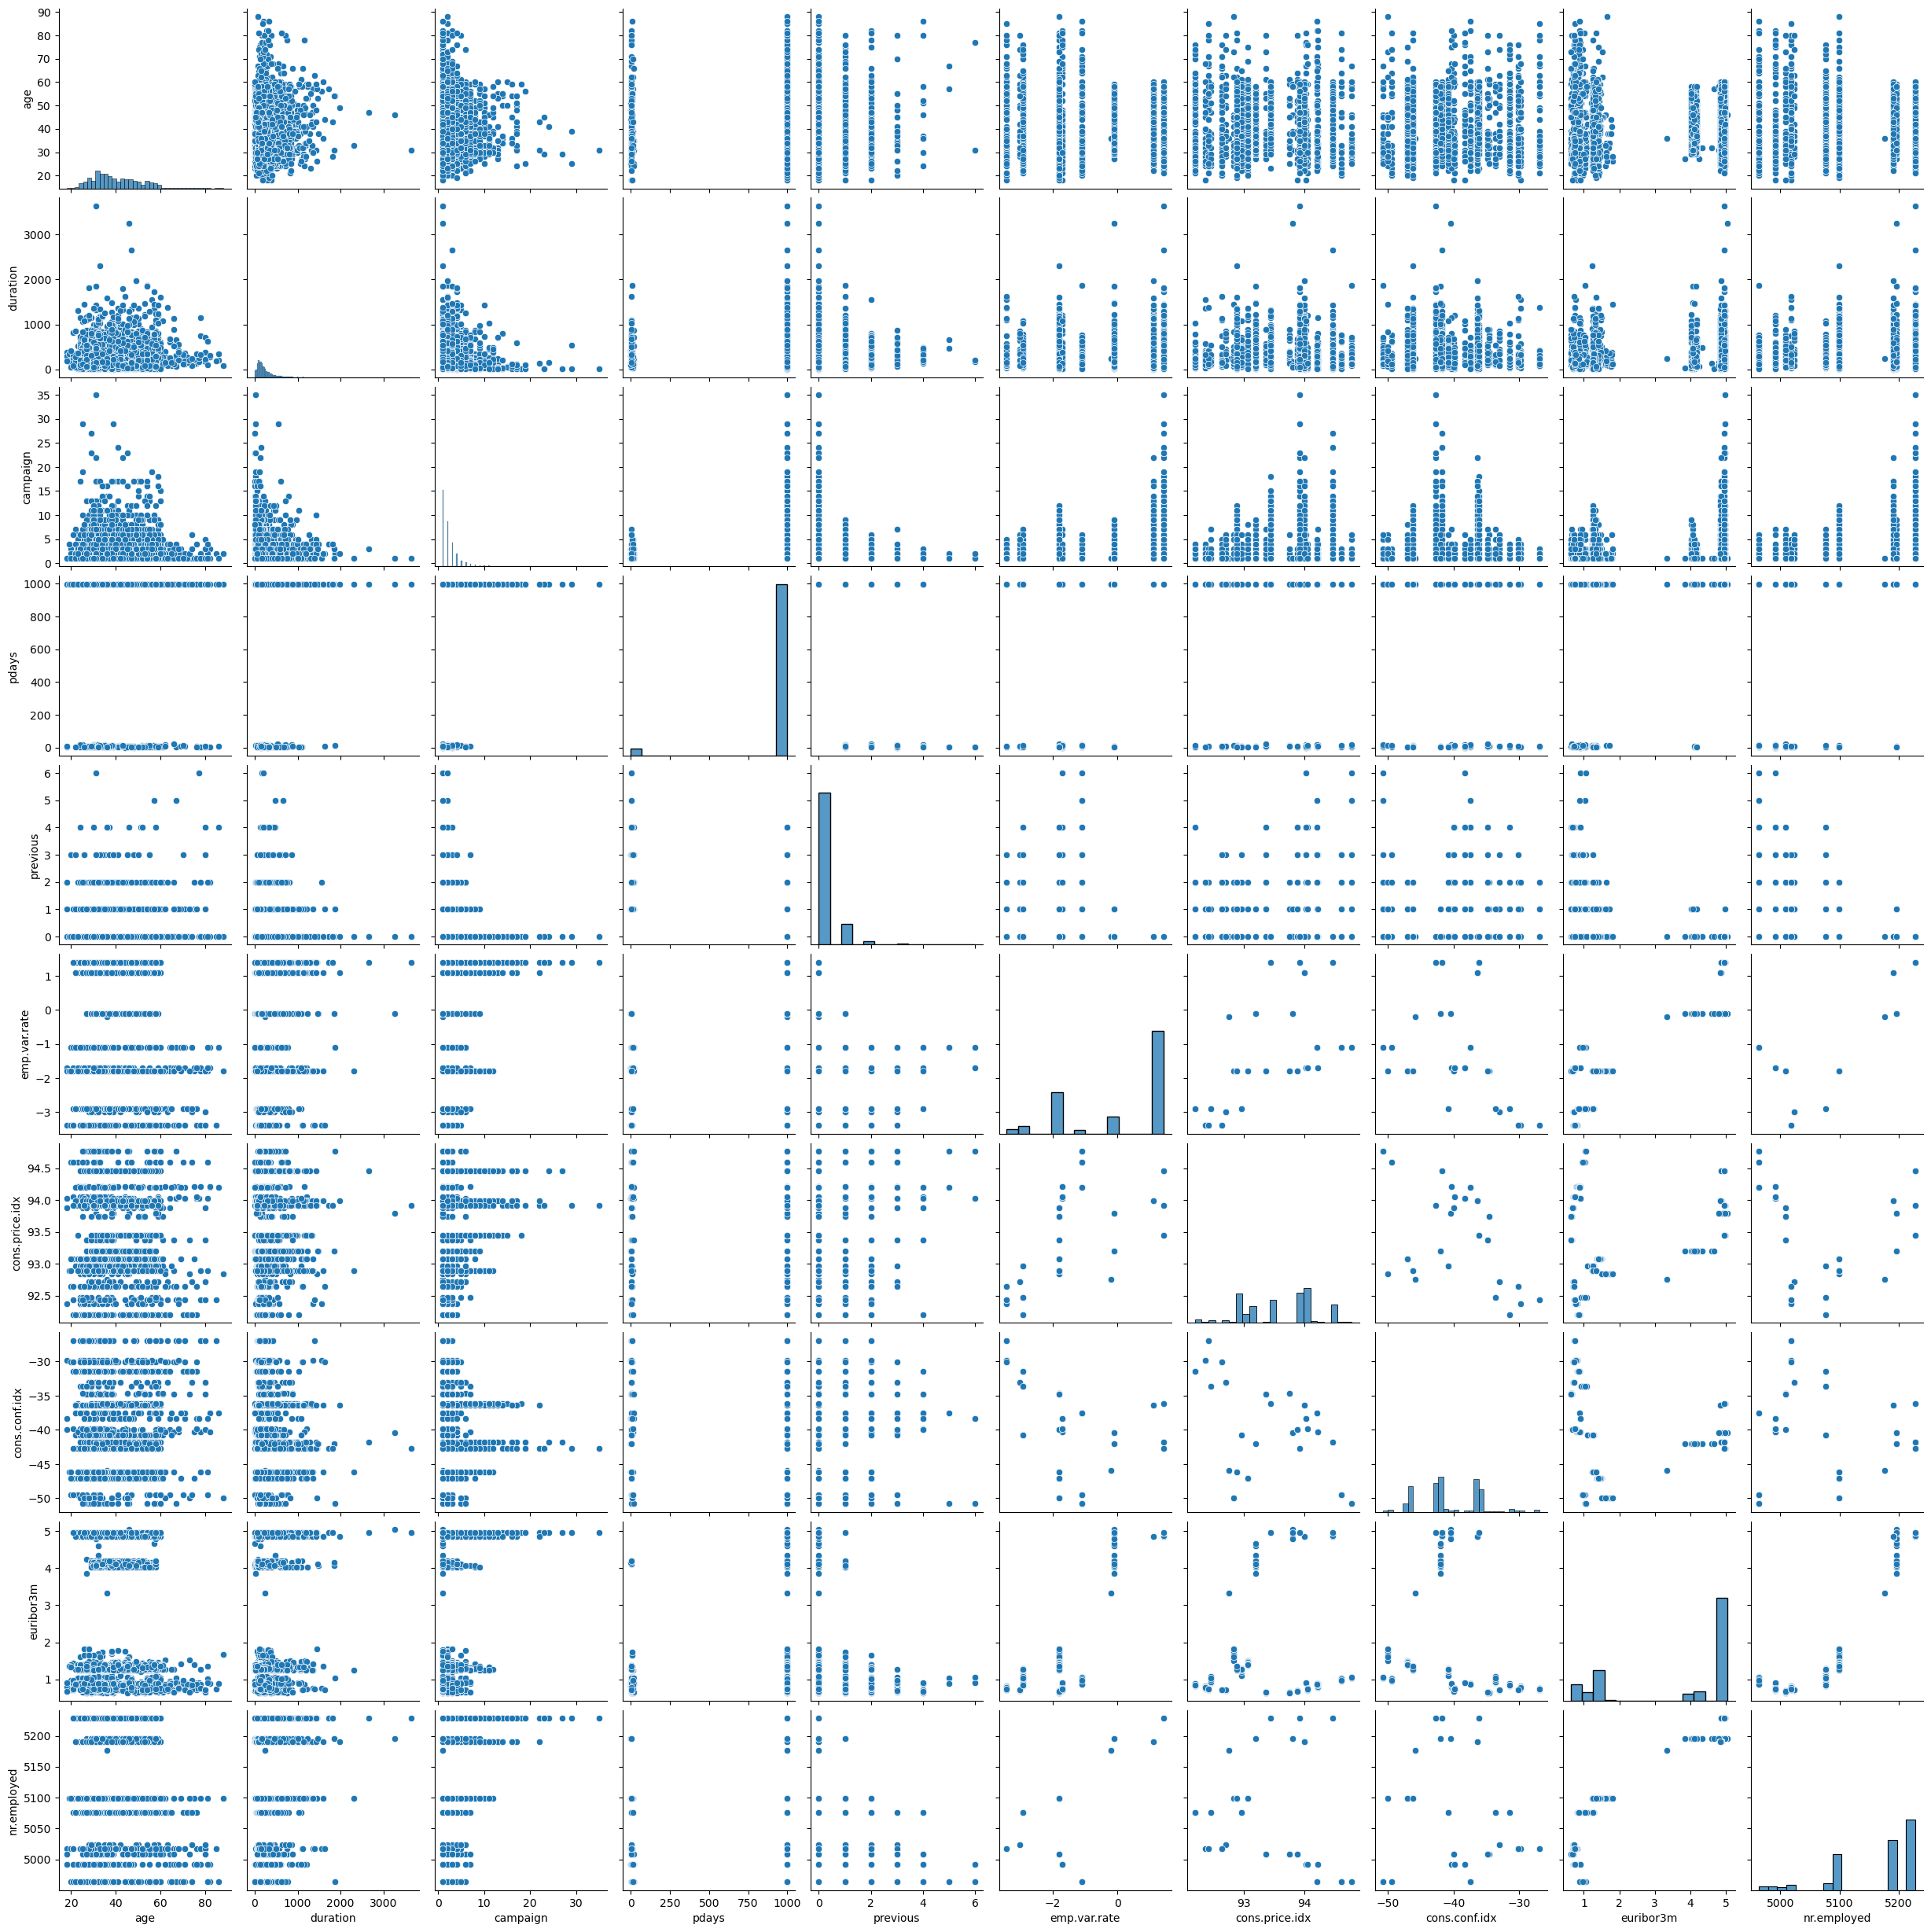

In [133]:
#Example: Pairplot to see relationship
sns.pairplot(data[num_cols])
plt.show()

In [151]:
data = pd.read_csv('bank-additional.csv', sep = ';')
data_encoded = pd.get_dummies(data, drop_first=True)

In [153]:
corr_matrix = data_encoded.corr()

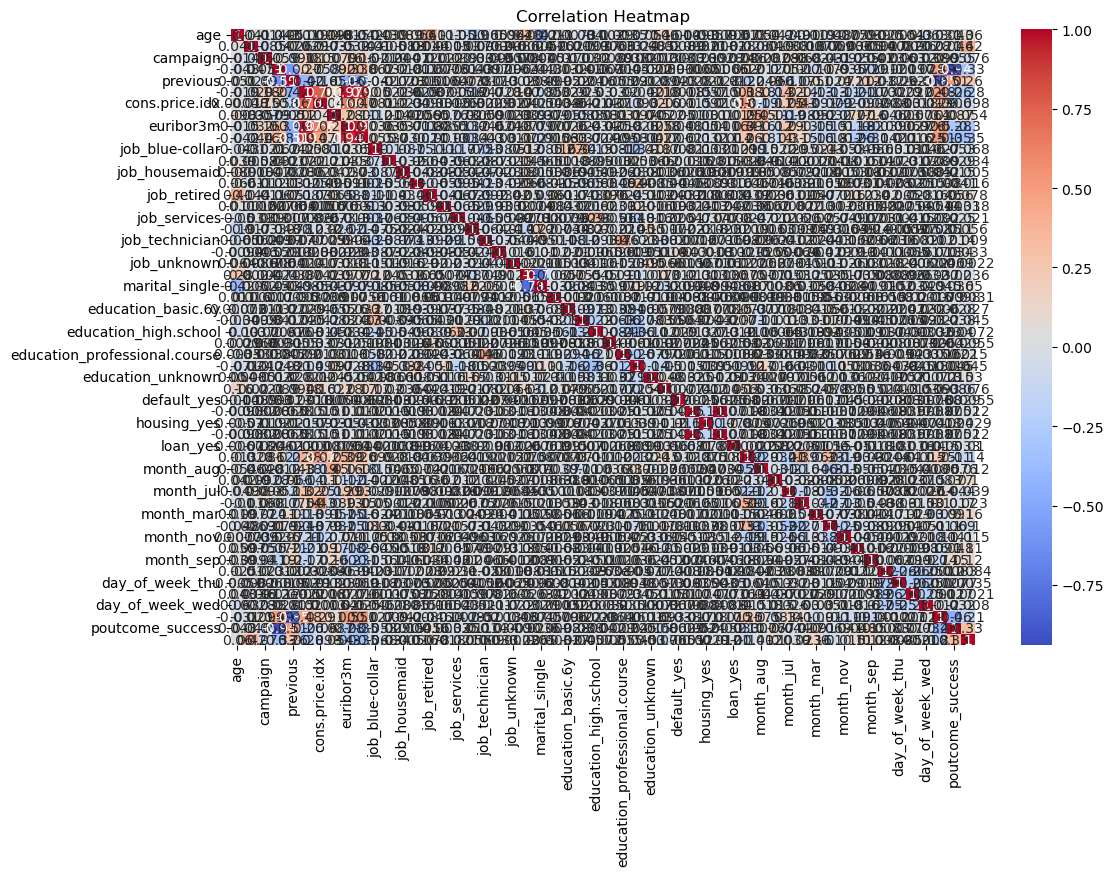

In [155]:
#Example: Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()